# Term Project  Carbajal Daniel



## Quality of Wine

A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

In [56]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import nsfg
import survival
import statistics

In [3]:
red_wine_df = pd.read_csv('winequality-red.csv')
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


Describe what the 5 variables mean in the dataset (Chapter 1).

Selecting the five variables for wine quality

The first variable will be volatile acidity because it will determine the acidity of the wine, and the next variable will be
residual sugar since that will determine the sweetness of the wine. The next variable is total_sulfur dioxide. The alcohol 
content will be next and the main variable used to determine how good the wine is will be the quality of the wine which is 
measured by three tasters and given the rank of 1 (worst) ton 10(best). So the five variables are as follows

volatile_acidity
residual_sugar
total_sulfur_dioxide
alcohol 
quality

In [31]:
redwine_df = pd.DataFrame(red_wine_df)
redwine_df = redwine_df[['volatile acidity','residual sugar','total sulfur dioxide','alcohol','quality' ]]
redwine_df = redwine_df.rename(columns={'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                                        'total sulfur dioxide':'total_sulfur_dioxide','alcohol':'alcohol','quality':'quality'})  
redwine_df.head

<bound method NDFrame.head of       volatile_acidity  residual_sugar  total_sulfur_dioxide  alcohol  quality
0                0.700             1.9                    34      9.4        5
1                0.880             2.6                    67      9.8        5
2                0.760             2.3                    54      9.8        5
3                0.280             1.9                    60      9.8        6
4                0.700             1.9                    34      9.4        5
...                ...             ...                   ...      ...      ...
1594             0.600             2.0                    44     10.5        5
1595             0.550             2.2                    51     11.2        6
1596             0.510             2.3                    40     11.0        6
1597             0.645             2.0                    44     10.2        5
1598             0.310             3.6                    42     11.0        6

[1599 rows x 5 column

In [28]:
redwine_df.head

<bound method NDFrame.head of       volatile_acidity  residual_sugar  total_sulfur_dioxide  alcohol  quality
0                0.700             1.9                    34      9.4        5
1                0.880             2.6                    67      9.8        5
2                0.760             2.3                    54      9.8        5
3                0.280             1.9                    60      9.8        6
4                0.700             1.9                    34      9.4        5
...                ...             ...                   ...      ...      ...
1594             0.600             2.0                    44     10.5        5
1595             0.550             2.2                    51     11.2        6
1596             0.510             2.3                    40     11.0        6
1597             0.645             2.0                    44     10.2        5
1598             0.310             3.6                    42     11.0        6

[1599 rows x 5 column

Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

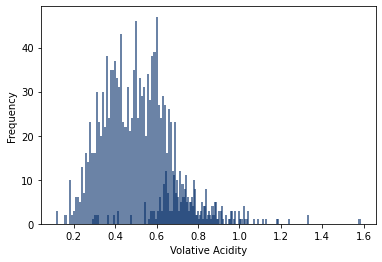

<Figure size 576x432 with 0 Axes>

In [40]:
width = 0.01
hist = thinkstats2.Hist(redwine_df.volatile_acidity)
thinkplot.Hist(hist, width = width)
thinkplot.Show(xlabel = 'Volative Acidity',ylabel = 'Frequency')

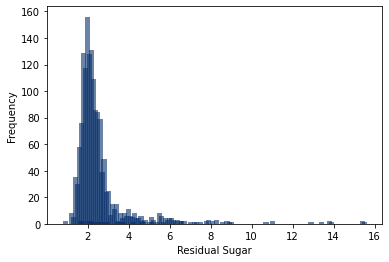

<Figure size 576x432 with 0 Axes>

In [36]:
width = 0.25
hist = thinkstats2.Hist(redwine_df.residual_sugar)
thinkplot.Hist(hist, width = width)
thinkplot.Show(xlabel = 'Residual Sugar',ylabel = 'Frequency')

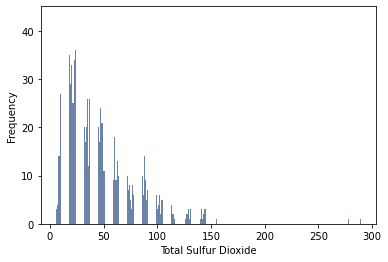

<Figure size 576x432 with 0 Axes>

In [39]:
width = 0.45
hist = thinkstats2.Hist(redwine_df.total_sulfur_dioxide)
thinkplot.Hist(hist, width = width)
thinkplot.Show(xlabel = 'Total Sulfur Dioxide',ylabel = 'Frequency')

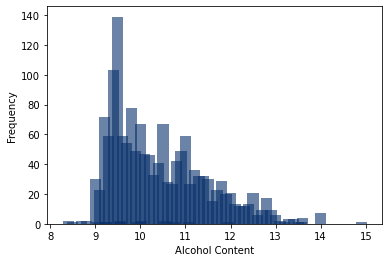

<Figure size 576x432 with 0 Axes>

In [48]:
width = 0.25
hist = thinkstats2.Hist(redwine_df.alcohol)
thinkplot.Hist(hist, width = width)
thinkplot.Show(xlabel = 'Alcohol Content',ylabel = 'Frequency')

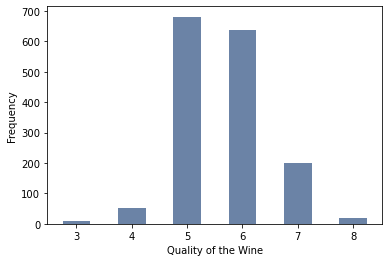

<Figure size 576x432 with 0 Axes>

In [47]:
width = 0.5
hist = thinkstats2.Hist(redwine_df.quality)
thinkplot.Hist(hist, width = width)
thinkplot.Show(xlabel = 'Quality of the Wine',ylabel = 'Frequency')

There appear to be outliers in all of the variables. This could drastically change the taste of the wine. With the exception of the quality of wine, there are outliers in all categories. Since the outliers can drastically change the taste, I will leave them in here for now in the analysis

Now to see what the basic statistics from these variables we can see for further analysis

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [54]:
redwine_df[['volatile_acidity','residual_sugar','total_sulfur_dioxide','alcohol','quality' ]].describe()

,volatile_acidity,residual_sugar,total_sulfur_dioxide,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,2.538806,46.468418,10.422983,5.636023
std,0.179060,1.409928,32.895920,1.065668,0.807569
min,0.120000,0.900000,6.000000,8.400000,3.000000
25%,0.390000,1.900000,22.000000,9.500000,5.000000
50%,0.520000,2.200000,38.000000,10.200000,6.000000
75%,0.640000,2.600000,62.000000,11.100000,6.000000
max,1.580000,15.500000,289.000000,14.900000,8.000000


The mean of the quality is 5.6 which from we can the different means of the variables which make up the wine. And we see that 
the highest rated wines were at 8.0. From here we can verify there are some outliers in all the variables although the alcohol content is not entirely a large outlier. Below are the mean and mode of the 5 different variables

In [64]:
statistics.mean(redwine_df.volatile_acidity),statistics.mode(redwine_df.volatile_acidity)

(0.5278205128205128, 0.6)

In [65]:
statistics.mean(redwine_df.residual_sugar),statistics.mode(redwine_df.residual_sugar)

(2.53880550343965, 2.0)

In [66]:
statistics.mean(redwine_df.total_sulfur_dioxide),statistics.mode(redwine_df.total_sulfur_dioxide)

(46.46841776110069, 28)

In [67]:
statistics.mean(redwine_df.alcohol),statistics.mode(redwine_df.alcohol)

(10.422983114446529, 9.5)

In [141]:
statistics.mean(redwine_df.quality),statistics.mode(redwine_df.quality)

(5.6360225140712945, 5)

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [132]:

n1 = redwine_df[redwine_df.volatile_acidity >= 0.527]
n1 =  n1[n1.quality  > 5]
hist1 = thinkstats2.Hist(n1.volatile_acidity)

n2 = redwine_df[redwine_df.volatile_acidity < 0.527]
n2 =  n1[n1.quality  > 5]
hist2 = thinkstats2.Hist(n2.volatile_acidity)



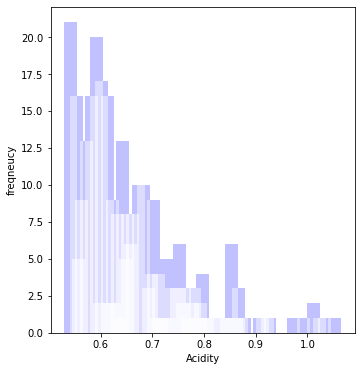

<Figure size 576x432 with 0 Axes>

In [140]:
width = 0.025
thinkplot.PrePlot(2, cols = 2)
thinkplot.Hist(hist1, align = 'left', width=width, color = 'blue')
thinkplot.Hist(hist2, align = 'left', width=width, color = 'white')
thinkplot.Show(xlabel = 'Acidity', ylabel = 'freqneucy')

looks like the less volatile acidity a wine has, the better quality it will be, However, there are several outliers in the high acidity range. This shows that the acidity is not good for most red wines. Red wines tend to be more dry and less sugar so a study in with sugar content would be good to do. For this plot It seems the lower the acidity above the mean volatile acidity, the better rating of the quality of the wine will be.

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).



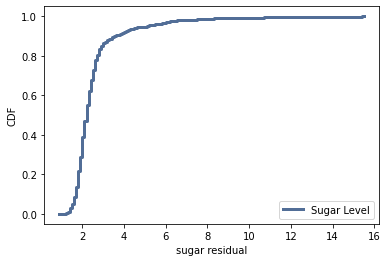

<Figure size 576x432 with 0 Axes>

In [155]:
resSug = redwine_df[redwine_df.residual_sugar > 0.1]
resSug =  resSug[resSug.quality  > 3]
cdf = thinkstats2.Cdf(resSug.residual_sugar, label = 'Sugar Level')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'sugar residual', ylabel = 'CDF')


The sugar levels tend to be at 2.5 which is the mean of the sugar levels. Most changes are between 0.1 and about 3 in terms of sugar residuals levels. So it looks like there is a certanin sugar level we want for a red wine. Too high of a sugar level is not wanted so most levels stay pretty steady. So a good quality wine needs some sugar but it has to be near the its mean.

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).


In [163]:
total_sulfur = redwine_df.total_sulfur_dioxide.dropna()

Mean, Var 45.66794136392607 923.0962380182317
Sigma 30.382498877120554


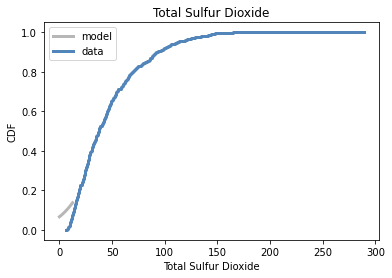

In [164]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(total_sulfur, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(total_sulfur, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Total Sulfur Dioxide',
                 xlabel='Total Sulfur Dioxide',
                 ylabel='CDF')

The total sulfur dioxide show it is not from a normal distribution. Thle line should be straight but there is a curve on the plot thus showing that total sulfur dioxide looks like the values have a bit of a curve at the higher levels. However, the mode and the data do match their approximate curves so it is not out of the range of being a normal distribution.

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).


In [178]:
df = redwine_df

In [179]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [180]:
sample = SampleRows(df, 1000)
sugar, acids = sample.residual_sugar, sample.volatile_acidity

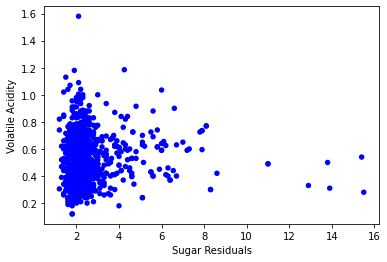

In [182]:
thinkplot.Scatter(sugar, acids, alpha=1)
thinkplot.Config(xlabel='Sugar Residuals',
                 ylabel='Volatile Acidity')

This scatter plot it concentratred on the left. It shows that the acidity is generally low as well as the sugar levels. So low acidity and low sugar residuals make for a good red wine. It appears that the more acidic a wine is, the less sugar it will have and the more sugar residuals a wine has the less acidic it will be

In [183]:
sample = SampleRows(df, 1000)
sulfur, alcohol = sample.total_sulfur_dioxide, sample.alcohol

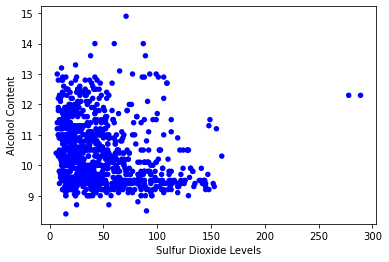

In [184]:
thinkplot.Scatter(sulfur, alcohol, alpha=1)
thinkplot.Config(xlabel='Sulfur Dioxide Levels',
                 ylabel='Alcohol Content')

This scatter plot is similar to the prior scatter plot. But in this case as the level of alcohol goes higher it appears that 
so does the total sulfur dioxide level. So they do tend to have a correlation. However we can see this further on the analysis.

In [187]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [188]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [189]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [190]:
Corr(sugar, acids)

0.009015226832277987

In [191]:
SpearmanCorr(sugar, acids)

0.03164397155678867

The correlation and the Spearman correlation both show very small levels of correlation between sugar and acids. It appears that even though the graph may show a possible correlation, the calculations show very small correlations. This is a good example of correlation by visualization is does not imply causation.

In [192]:
Corr(sulfur, alcohol)

-0.19242907785689622

In [193]:
SpearmanCorr(sulfur, alcohol)

-0.2545962240845673

In the case of sulfur and alcohol content there is a slight negative correlation between the two. It looks like the less 
sulfur dioxide is in the wine the more alcohol there will be and vice versa. But one must still be careful to declare it a correlation since other factors could be causing this to correlate. 

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [201]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [206]:
data =  redwine_df.total_sulfur_dioxide, redwine_df.alcohol

In [207]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [209]:
data = redwine_df.residual_sugar, redwine_df.volatile_acidity

In [205]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Both tests are at 0, does no permutation level can be measured. Does neither of the two correlations are real and possible the are based just on chance. Neither of the results is statistically significant.

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [218]:
import statsmodels.formula.api as smf

formula = 'quality ~ volatile_acidity + alcohol'
model = smf.ols(formula, data=redwine_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     370.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          7.35e-133
Time:                        17:49:24   Log-Likelihood:                -1621.8
No. Observations:                1599   AIC:                             3250.
Df Residuals:                    1596   BIC:                             3266.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0955      0.184     16.778      0.000       2.734       3.457
volatile_acidity    -1.3836      0.095    -14.524      0.000      -1.570      -1.197
alcohol              0.3138      0.016     19.604      0.000       0.282       0.345
==============================================================================
Omnibus:                       17.005   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.998
Skew:                          -0.064   Prob(JB):                     2.26e-06
Kurtosis:                       3.611   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The multiple regression of volatile acidity and alcohol level is showing both variables are statistically significant in 
determining the quality of wine. The R-squared variable shows that there is a 31.7 percent that this is not by chance. So it is quite possible that while the variables may be nor not be correlated, they do show a statistically significance when determining the level of quality in wine